<a href="https://colab.research.google.com/github/stevengregori92/Learn-XGBoost-with-Feature-Importance/blob/main/HeartAttack_with_PCA_and_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install luwiji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 24.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.2 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.1-py2.py3-none-any.whl size=40366830 sha256=5c8bef18366f0a32689d3f55919e28fa199cf29fd4d9a623cc46e8936133ba66
  Stored in directory: /root/.cache/pip/wheels/ba/90/9e/943ac5067e9cdc185d8f029a1d13278acd52839118acc06c9a
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32178 sha256=7eb8fffdbeb049c27a7ba9e1623e9324e74336009333fcbfadeee0fbb3ced264
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built luwiji jcopml


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

#Import Dataset

In [3]:
!gdown https://drive.google.com/uc?id=1h6NIeIxQZ-0H8JYTmCRZ3iwhCpe4y9a9

Downloading...
From: https://drive.google.com/uc?id=1h6NIeIxQZ-0H8JYTmCRZ3iwhCpe4y9a9
To: /content/heartattack.zip
100% 4.21k/4.21k [00:00<00:00, 12.3MB/s]


In [4]:
!unzip /content/heartattack.zip

Archive:  /content/heartattack.zip
  inflating: heart.csv               
  inflating: o2Saturation.csv        


In [5]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.thall.value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

#Cleaning Dataset

,missing_value,%
age,0,0.0
sex,0,0.0
cp,0,0.0
trtbps,0,0.0
chol,0,0.0
fbs,0,0.0
restecg,0,0.0
thalachh,0,0.0
exng,0,0.0
oldpeak,0,0.0


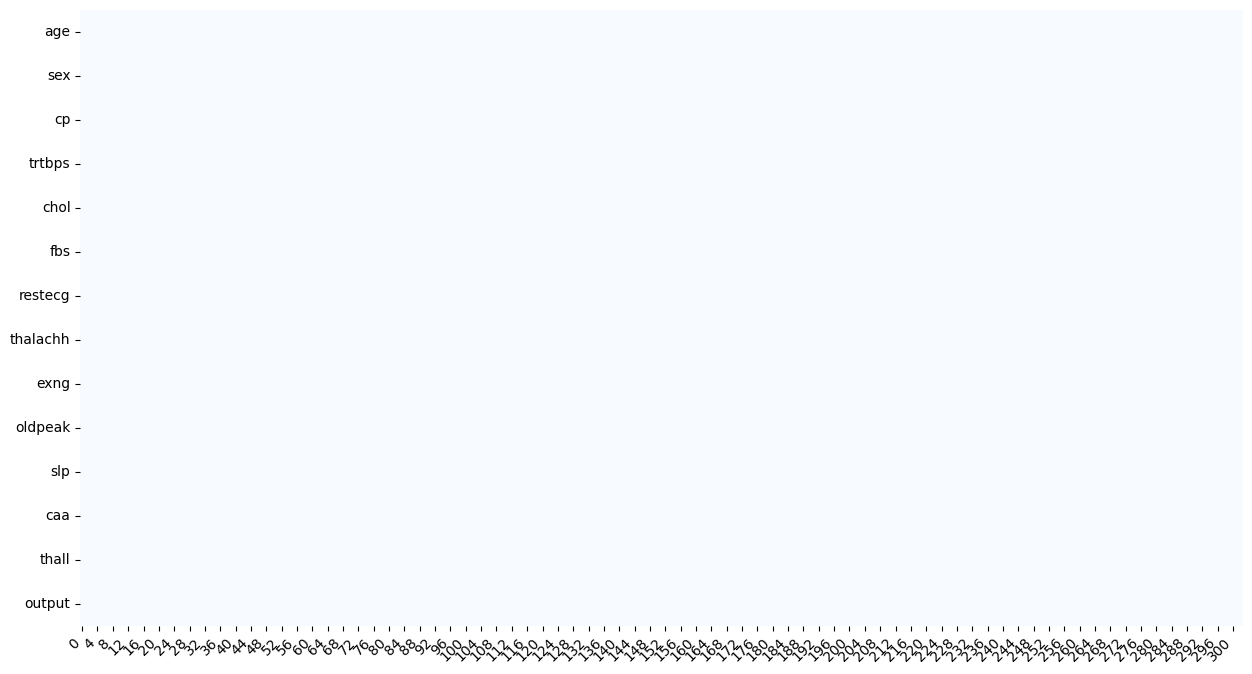

In [7]:
plot_missing_value(df, return_df=True)

#Dataset Splitting

In [8]:
X = df.drop(columns=['output'])
y = df.output

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
sm = SMOTE(random_state=42,sampling_strategy='auto')
X_train, y_train = sm.fit_resample(X, y)

#Training

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA().fit(X_train)

Text(0, 0.5, 'Cumulative Explained Variance')

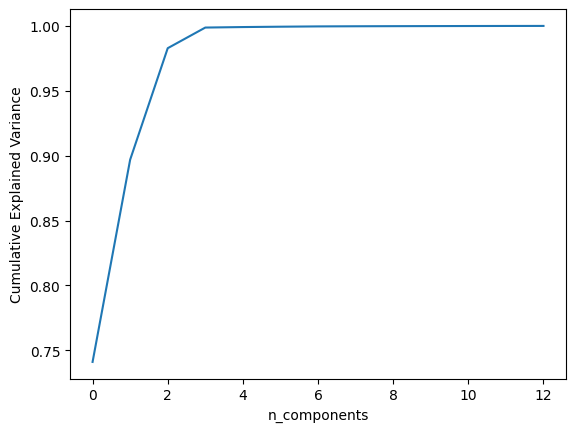

In [13]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance')

In [14]:
X_train.iloc[0:2]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2


In [15]:
X_train.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

In [16]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [17]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust'), ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']),
    ('categoric', cat_pipe(encoder='onehot'), ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('pca', PCA(n_components=4, whiten=True)),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter = 50, n_jobs=-1, verbose=1, random_state = 42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.9763799669573133, 'algo__gamma': 3, 'algo__learning_rate': 0.05820013372709852, 'algo__max_depth': 4, 'algo__n_estimators': 163, 'algo__reg_alpha': 0.07362945281639222, 'algo__reg_lambda': 2.752717392942944, 'algo__subsample': 0.6401537692938899}
0.8666666666666667 0.8060606060606061 0.9016393442622951


#Confusion Matrix

In [18]:
from jcopml.plot import plot_confusion_matrix

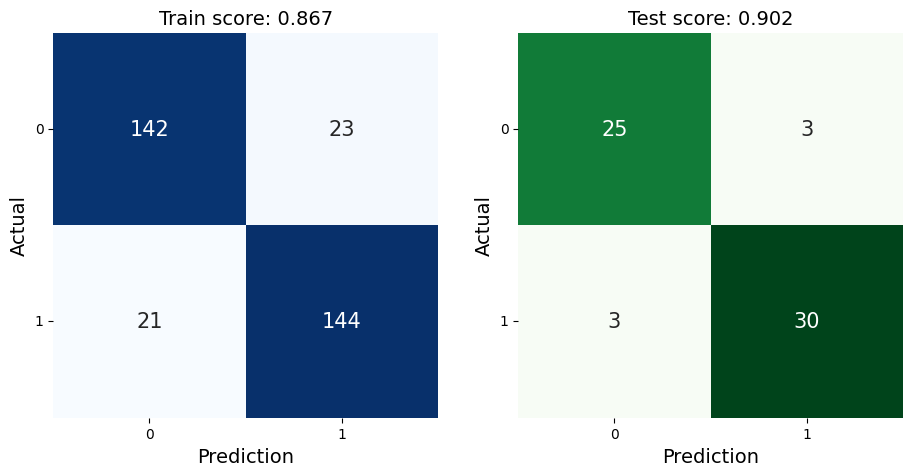

In [19]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

In [20]:
from jcopml.plot import plot_classification_report

In [21]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report= True)

Train report
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       165
           1       0.86      0.87      0.87       165

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330


Test report
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.91      0.91      0.91        33

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

